# Task Desription

Please read first the following abstract

## Abstract
                
RNA-Seq reveals an unprecedented complexity of the neuroblastoma transcriptome and is suitable for clinical endpoint prediction [ microarray ]

### Experiment Description  

We generated gene expression profiles from 498 primary neuroblastomas using RNA-Seq and microarrays. We sought to systematically evaluate the capability of RNA deep-sequencing (RNA-Seq)-based classification for clinical endpoint prediction in comparison to microarray-based ones. The neuroblastoma cohort was randomly divided into training and validation sets (**Please note:** <em>in the following we refer to this validation set as test set</em>), and 360 predictive models on six clinical endpoints were generated and evaluated. While prediction performances did not differ considerably between the two technical platforms, the RNA-Seq data processing pipelines, or feature levels (i.e., gene, transcript, and exon junction levels), RNA-Seq models based on the AceView database performed best on most endpoints. Collectively, our study reveals an unprecedented complexity of the neuroblastoma transcriptome, and provides guidelines for the development of gene expression-based predictive classifiers using high-throughput technologies.  Sample clinical characteristics definitions:  

* sex: 
    <ul>
    <li>M = male</li>
    <li>F = female</li>
    </ul>
    
* age at diagnosis: The age in days at diagnosis 
    <ul>
    <li>integer</li>
    </ul>

* high risk: Clinically considered as high-risk neuroblastoma
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>


* INSS stage: Disease stage according to International Neuroblastoma Staging System ([INSS](https://www.cancer.org/cancer/neuroblastoma/detection-diagnosis-staging/staging.html)) 
    <ul>
    <li>1</li>
    <li>2</li>
    <li>3</li>
    <li>4</li>
    <li>4S</li>
    </ul>


* progression: Occurrence of a tumor progression event
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>



* death from disease: Occurrence of death from the disease (yes=1; no=0) 
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>





Gene expression of 498 neuroblastoma samples was quantified by RNA sequencing as well as by microarray analyses in order to understand the neuroblastoma transcriptome and predict clinical endpoints. 


## Task

The task is to predict the missing values in the validation set (from here on called test set). Do this either with the RNASeq or the Microarray data, or potentially both?



## Code

To make your start a bit easier, here is a small notebook reading the data in. It finishes with a function enabling you to save your predictions for submission. 

#### from here, the code starts

First some imports 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plotting and visulisation
import seaborn as sns # nicer (easier) visualisation
%matplotlib inline


# for saving
import os,os.path

### Setting  up directory and filenames

In [2]:
data_dir = '..{}data'.format(os.path.sep)

fn_fpkm             = 'log2FPKM.tsv'
fn_patient_info     = 'patientInfo.tsv'
fn_prop_intensities = 'allProbIntensities.tsv'


### Load the RNA-Seq data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [3]:
df_fpkm = pd.read_csv('{}/{}'.format(data_dir,fn_fpkm),sep='\t',).rename({'00gene_id':'gene_id'},axis=1)
df_fpkm = df_fpkm.set_index(['gene_id'])
df_fpkm.columns.name = 'ID'
df_fpkm.head()

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


In [4]:
#List patient ID
mylist=list(df_fpkm)
#mylist

In [5]:
#Keep the 
myL=[]
for char in mylist:
    g = char[:5]
    myL.append(g)
    #print(g) 
    
    

In [6]:
df_fpkm.columns=myL
df_fpkm.head()

,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


In [7]:
df_fpkm.iloc[:,30:50]

,NB031,NB032,NB033,NB034,NB035,NB036,NB037,NB038,NB039,NB040,NB041,NB042,NB043,NB044,NB045,NB046,NB047,NB048,NB049,NB050
gene_id,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.436579,1.076244,0.683781,1.019211,0.943636,0.718348,0.629979,0.732586,0.828116,1.084670,0.645144,0.737983,0.760957,1.083874,0.992291,0.821687,0.843345,0.337978,1.103498,0.827757
A1BG,1.844205,1.792710,1.621463,1.802938,1.594740,1.481335,1.406879,1.528446,1.616536,1.851439,1.557341,1.762187,1.306875,1.124666,1.576614,1.569165,1.573869,1.926383,1.610502,1.926296
A1BG-AS1,1.283910,1.066358,0.800278,1.395885,1.246615,1.123997,1.025560,1.151508,1.205055,1.279863,1.152326,1.206812,1.149181,1.163022,0.962849,1.279192,1.501093,1.013941,0.991966,1.531069
A1CF,0.000000,0.005221,0.021089,0.004336,0.019500,0.005249,0.000000,0.028757,0.042508,0.005479,0.021832,0.005034,0.030836,0.021644,0.005278,0.005265,0.000000,0.004661,0.005078,0.000000
A2LD1,0.668352,0.815074,0.637956,1.198450,0.621192,1.005148,0.719900,0.925812,0.832686,0.692755,0.535418,1.214747,0.674591,0.522451,0.719081,0.789252,0.963666,0.583349,1.139122,0.682246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.093152,0.011584,0.113494,0.181250,0.021669,0.011651,0.011480,0.012047,0.011696,0.059782,0.021599,0.011189,0.000000,0.000000,0.034839,0.068646,0.000000,0.298686,0.076990,0.068518
ZYG11B,3.887749,3.471279,3.716750,3.391076,3.481583,3.323184,3.429429,3.476589,3.429418,3.107244,3.826843,3.144996,3.903771,3.548128,3.523725,3.585119,3.689489,3.413574,3.564439,3.487564
ZYX,5.674639,5.631442,4.769158,5.747167,5.502668,5.475487,5.244461,5.696236,5.145730,5.842906,4.737562,5.736648,5.052329,6.258771,5.634181,5.078973,5.088362,6.241137,5.835196,5.494131


### Load the Microarray data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [8]:
df_prop_intensities = pd.read_csv('{}/{}'.format(data_dir,fn_prop_intensities),sep='\t').set_index(['Reporter.Identifier'])
df_prop_intensities.columns.name = 'ID'

df_prop_intensities.head()

ID,GeneSymbols,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
Reporter.Identifier,,,,,,,,,,,,,,,,,,,,,
28913,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,11.70,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
27262,NaN,9.20,10.41,9.27,8.83,7.97,10.33,9.62,8.72,9.36,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,7.08
3180,NaN,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,6.43,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,2.63,2.54
41426,MBL1P,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,8.02,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,7.11
37033,NaN,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,5.15,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34


### Load the patient factors, including the potential endpoints 

This part already sets the indeces in the DataFrame. Please feel free to change as required. 
Please note, that the ```FactorValues``` should have a 1-to-1 correspondence to the factors desc ribed in the abstract. 

In [9]:
df_patient_info = pd.read_csv('{}/{}'.format(data_dir,fn_patient_info),sep='\t').set_index('ID')
df_patient_info.columns.name = 'FactorValues'
df_patient_info.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB497,female,379,0.0,0.0,1,0.0
NB496,male,132,NaN,NaN,NaN,NaN
NB495,male,163,0.0,0.0,1,0.0
NB494,male,56,NaN,NaN,NaN,NaN


In [10]:
#Reverese 
df_patient_info = df_patient_info[::-1]


####  Divide into training and external testing

As you might have already noticed, we removed some of the factor values for some of the patient **ID**s.
Every row, where this information is missing indicate a real validation entry. We can use this information and create two separate DataFrames, one for training, one for the validation (testing). 

The task is to predict the missing values, either with the RNASeq or the Microarray data, or potentially both?



In [11]:
df_patient_info.head()


FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB001,male,987,1.0,1.0,4,1.0
NB002,male,1808,NaN,NaN,NaN,NaN
NB003,female,625,1.0,1.0,4,1.0
NB004,female,335,NaN,NaN,NaN,NaN
NB005,female,536,1.0,1.0,4,1.0


In [12]:
df_patient_info_train  = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].notna()]
df_patient_info_test   = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].isna()]



In [13]:
df_patient_info_train.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB001,male,987,1.0,1.0,4,1.0
NB003,female,625,1.0,1.0,4,1.0
NB005,female,536,1.0,1.0,4,1.0
NB007,male,942,0.0,1.0,4,1.0
NB009,female,217,0.0,1.0,4S,0.0


In [14]:
df_patient_info_test.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB002,male,1808,NaN,NaN,NaN,NaN
NB004,female,335,NaN,NaN,NaN,NaN
NB006,male,147,NaN,NaN,NaN,NaN
NB008,male,1652,NaN,NaN,NaN,NaN
NB010,male,379,NaN,NaN,NaN,NaN


## Analysis

From here on, you will need to use your skills ...

### Note:
To be clear, there are **multiple** target features/attributes to predict. Say you want to build a model predicting **death from disease** of a patient, your target variable is ```'FactorValue..death.from.disease.'``` and the corresponding target vector <em>y</em> would be as follows:

```python
y_train = df_patient_info_train['FactorValue..death.from.disease.'].astype(int)
```
Taking the other data into account (RNASeq or microarray) as ``` X_train``` (you will have to preprocess and split this information yourselves), you could for example build a random forest model:

```python
from sklearn.ensemble import RandomForestClassifier
random_f_model_death = random_f_model = RandomForestClassifier() 
random_f_model_death.fit(X_train,y_train)
```
and predict ```y_test``` using ```X_test```. 

Obviously, you want to avoid any overfitting and might want to use appropriate validation approaches. 

Once you have your model and the prediction for the test data, you should be able to fill the ```'FactorValue..death.from.disease.'``` column in the test set. 

For the submission, please also include the confidence/probability/score for each of the prediction (assume ```1``` to be the value for the positive class). This only applies to the factors:  **high risk**, **progression** and **death from disease** . 

The other two factors need to be treated differently. 

More information on how to submit the results will follow. 

Using this very rough outline, you should be able to predict all factors in the test data. 











In [15]:
#Divide into training and external testing
from sklearn import datasets

In [16]:
#Removing even number IDs
RNA_train = df_fpkm.iloc[0:23146,::2]

#Transform RNASeq Data 
RNA_train = RNA_train.transpose()
RNA_train.head()


gene_id,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
NB001,0.834381,1.910053,1.453191,0.005102,0.580151,5.137167,0.027558,0.170671,1.535670,0.057101,...,3.651545,5.045111,1.575337,2.395551,3.466692,0.862512,3.561729,5.039327,3.245179,3.296496
NB003,0.909414,1.950857,1.156765,0.005192,0.927667,5.405414,0.028036,0.045284,0.943194,0.000000,...,3.547080,4.721531,1.508530,2.482464,3.056684,0.022912,2.236695,4.982975,2.880531,2.431521
NB005,0.905540,1.942946,1.365043,0.025347,0.924853,5.613060,0.000000,0.000000,1.549078,0.032056,...,3.582977,4.766362,1.038738,1.890104,2.823576,0.049621,2.235632,5.236531,2.761698,2.226502
NB007,1.811352,1.617745,1.304178,0.000000,1.018705,6.956301,0.000000,0.210127,1.959344,0.164813,...,3.475448,4.009473,1.407451,2.198063,3.123347,0.044684,3.130989,5.645258,2.755304,2.933508
NB009,0.981855,1.436439,0.771248,0.021880,0.666877,5.170205,0.000000,0.000000,1.374772,0.031028,...,3.581122,5.193176,1.196494,2.289598,3.409242,0.012183,2.361504,5.393207,2.730553,2.271136


In [17]:
#Removing odd number IDs
RNA_test = df_fpkm.iloc[0:23146,1::2]

#Transform RNASeq Data 
RNA_test = RNA_test.transpose()
RNA_test.head()

gene_id,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
NB002,0.743094,0.941996,0.640614,0.005902,0.738233,5.116157,0.000000,0.000000,1.038092,0.066125,...,3.617510,5.037365,1.487028,2.748315,3.201112,0.051655,3.595790,5.144157,2.843600,3.052771
NB004,0.795775,1.989477,1.525277,0.000000,0.936497,6.034460,0.000000,0.044204,1.091341,0.028540,...,3.699507,4.157084,1.351250,2.447746,3.081720,0.108028,3.312516,6.142091,2.864198,3.119886
NB006,0.869154,1.927608,0.899212,0.005682,0.739038,5.281676,0.000000,0.000000,1.184775,0.032086,...,3.577320,4.726079,1.567141,2.373818,3.190773,0.264942,3.459969,6.108395,3.970366,3.074821
NB008,0.599240,2.161291,1.189205,0.000000,0.546324,5.221807,0.008817,0.000000,0.798254,0.054667,...,3.550113,3.800683,1.618957,2.620216,3.262666,0.000000,2.359791,5.018567,2.817902,3.395432
NB010,1.066399,2.159797,1.114787,0.000000,0.865850,4.399096,0.008982,0.000000,0.850427,0.000000,...,3.507782,4.289820,0.794625,2.559624,2.931842,0.021898,3.284610,5.730512,2.880292,3.263155


In [18]:
#Checking for missing data in RNA_train
RNA_train.isnull().sum()

gene_id
1/2-SBSRNA4    0
A1BG           0
A1BG-AS1       0
A1CF           0
A2LD1          0
              ..
ZYG11A         0
ZYG11B         0
ZYX            0
ZZEF1          0
ZZZ3           0
Length: 23146, dtype: int64

In [19]:
#Checking for missing data in RNA_test
RNA_test.isnull().sum()

gene_id
1/2-SBSRNA4    0
A1BG           0
A1BG-AS1       0
A1CF           0
A2LD1          0
              ..
ZYG11A         0
ZYG11B         0
ZYX            0
ZZEF1          0
ZZZ3           0
Length: 23146, dtype: int64

In [20]:
#Checking for missing data in Patient info train
df_patient_info_train.isnull().sum()

FactorValues
FactorValue..Sex.                   0
FactorValue..age.at.diagnosis.      0
FactorValue..death.from.disease.    0
FactorValue..high.risk.             0
FactorValue..inss.stage.            0
FactorValue..progression.           0
dtype: int64

In [21]:
#Checking for missing data in Patient info test
df_patient_info_test.isnull().sum()

FactorValues
FactorValue..Sex.                     0
FactorValue..age.at.diagnosis.        0
FactorValue..death.from.disease.    249
FactorValue..high.risk.             249
FactorValue..inss.stage.            249
FactorValue..progression.           249
dtype: int64

In [22]:
#Step 1
#Implementation of best model param (selection) code that will be utilized over the next steps
#We are fitting FactorValue..death.from.disease. to the best model, 
#Validating the model over our train data
#And finally implementing the model on our test data

In [23]:
#Attributing an integer value (FactorValue..death.from.disease.) to y_train
y_trainD = df_patient_info_train['FactorValue..death.from.disease.'].astype(int)

In [24]:
Age_train = df_patient_info_train['FactorValue..age.at.diagnosis.']

In [25]:
#Importing train_test_split function and split our RNA_train and y_train data and our test size is 20% of our sample
from sklearn.model_selection import train_test_split
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(
    RNA_train, y_trainD, test_size=0.2, random_state=0)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [27]:
#Model dictionary 
model_param = {
    #Decision Tree
    #Criterion function allows us to choose the best precision parameter
        'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion':['gini','entropy']
        }
    },
    #RandomForestClassifier
    #n_estimators provide the number of trees you want to build before taking the maximum voting or averages of predictions
        'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[20,50,80,120,150]
        }
    },
    #KNeighborClassifier
    #n_neighbors number of neighbors for each sample used to make predictions
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors':[5,10,15,20,25]
        }
    },
    #Support Vector Classification 
    #Specifies the kernel type to be used in the algorithm.
    #rbf (radial basis function) is the most commonly used, it is similar to the guassian distribution
        'svc':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid']
        }
    }
  
    
}

In [28]:
#Confidence Score
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(RNA_train, y_trainD)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_param':model_selection.best_params_
    })

In [29]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_param'])
df_model_score

#RandomForestClassifier model showed to have the best score for FactorValue..death.from.disease.

,model,best_score,best_param
0,DecisionTreeClassifier,0.791020,{'criterion': 'gini'}
1,RandomForestClassifier,0.819102,{'n_estimators': 120}
2,KNeighborsClassifier,0.798939,{'n_neighbors': 10}
3,svc,0.795184,{'kernel': 'rbf'}


In [30]:
#Validating RFC model 
model_rfcD = RandomForestClassifier(n_estimators = 80)

In [31]:
model_rfcD.fit(X_train_D, y_train_D)

RandomForestClassifier(n_estimators=80)

In [32]:
model_rfcD.score(X_test_D, y_test_D)

0.78

In [33]:
#Visualizing RFC true/false predictions 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_D,model_rfcD.predict(X_test_D))
cm

array([[35,  5],
       [ 6,  4]])

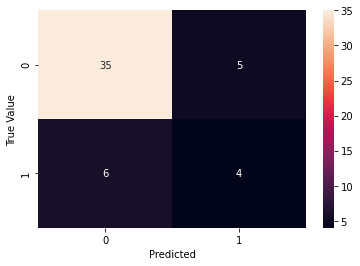

In [34]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Beige is equivalent to true positives (39 TP)
#Purple is equivalent to false negatives (10 FN)
#Bottom right Black is equivalent to true negatives (0 TN)
#Top right Black is equivalent to false positives (1 FP)


In [36]:
#Attributing a FactorValue..death.from.disease.value to y_test
model_rfcD.fit(RNA_train, y_trainD)
y_testD = df_patient_info_test['FactorValue..death.from.disease.']
X_testD = RNA_test

In [37]:
death_from_disease = model_rfcD.predict(X_testD)
print(death_from_disease)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [38]:
death_from_disease = pd.DataFrame(death_from_disease)
death_from_disease.dropna().to_csv("death_from_disease.csv", index=False)

In [39]:
#Step 2
#We are fitting FactorValue..high.risk. to the best model, 
#Validating the model over our train data
#And finally implementing the model on our test data

In [40]:
#Attributing an integer value (FactorValue..high.risk.) to y_train
y_trainH = df_patient_info_train['FactorValue..high.risk.'].astype(int)

In [41]:
#Splitting y_train, and RNA_train data and our test size is 20% of our sample
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(
    RNA_train, y_trainH, test_size=0.2, random_state=0)

In [42]:
#Confidence Score
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(RNA_train, y_trainH)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_param':model_selection.best_params_
    })

In [43]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_param'])
df_model_score

#SVC model showed to have the best score for FactorValue..high.risk.

,model,best_score,best_param
0,DecisionTreeClassifier,0.863429,{'criterion': 'entropy'}
1,RandomForestClassifier,0.895347,{'n_estimators': 20}
2,KNeighborsClassifier,0.863592,{'n_neighbors': 5}
3,svc,0.895510,{'kernel': 'linear'}


In [44]:
#Validating RFC model 
model_rfcH = RandomForestClassifier(n_estimators = 80)

In [45]:
model_rfcH.fit(X_train_H, y_train_H)

RandomForestClassifier(n_estimators=80)

In [46]:
model_rfcH.score(X_test_H, y_test_H)

0.92

In [47]:
#Visualizing RFC true/false predictions 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_H,model_rfcH.predict(X_test_H))
cm

array([[31,  2],
       [ 2, 15]])

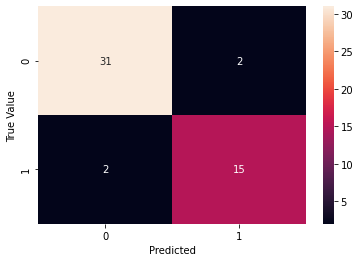

In [48]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Beige is equivalent to true positives (29 TP)
#Purple is equivalent to false negatives (18 FN)
#Bottom right Black is equivalent to true negatives (2 TN)
#Top right Black is equivalent to false positives (1 FP)

In [49]:
#RandomForestClassifier
#Attributing a FactorValue..FactorValue..high.risk. to y_test
y_testH = df_patient_info_test['FactorValue..high.risk.']
X_testH = RNA_test

In [50]:
model_rfcH.predict(X_testH)

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0])

In [51]:
#Implementing SVC
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel='rbf')

In [52]:
svc.fit(X_train_H, y_train_H)

SVC()

In [53]:
print('SVC Accuracy：\n',svc.score(X_test_H, y_test_H))

SVC Accuracy：
 0.94


In [54]:
#Visualizing SVC true/false predictions 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_H,svc.predict(X_test_H))
cm

array([[32,  1],
       [ 2, 15]])

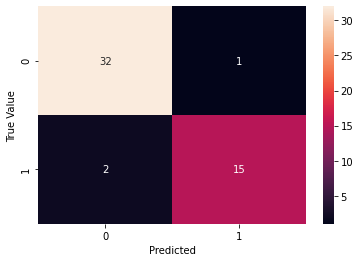

In [55]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Beige is equivalent to true positives (29 TP)
#Purple is equivalent to false negatives (19 FN)
#Bottom right Black is equivalent to true negatives (1 TN)
#Top right Black is equivalent to false positives (1 FP)


In [56]:
svc.fit(RNA_train, y_trainH)

SVC()

In [57]:
high_risk = svc.predict(X_testH)
print(high_risk)

[1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0]


In [58]:
high_risk = pd.DataFrame(high_risk) ###############################
high_risk.dropna().to_csv("high.risk.csv", index=False)

In [59]:
#Step 3
#We are fitting FactorValue..progression. to the best model, 
#Validating the model over our train data
#And finally implementing the model on our test data

In [60]:
#Attributing an integer value (FactorValue..progression.) to y_train
y_trainP = df_patient_info_train['FactorValue..progression.'].astype(int)

In [61]:
#Splitting y_train, and RNA_train data and our test size is 20% of our sample
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(
    RNA_train, y_trainP, test_size=0.2, random_state=0)

In [62]:
#Confidence Score
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(RNA_train, y_trainP)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_param':model_selection.best_params_
    })

In [63]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_param'])
df_model_score

#SVC showed to be the best model fit for FactorValue..progression.

,model,best_score,best_param
0,DecisionTreeClassifier,0.682694,{'criterion': 'gini'}
1,RandomForestClassifier,0.734776,{'n_estimators': 20}
2,KNeighborsClassifier,0.694612,{'n_neighbors': 15}
3,svc,0.710857,{'kernel': 'rbf'}


In [64]:
#RandomForestClassifier

In [65]:
#Validating RFC model 
model_rfcP = RandomForestClassifier(n_estimators = 80)

In [66]:
model_rfcP.fit(X_train_P, y_train_P)

RandomForestClassifier(n_estimators=80)

In [67]:
model_rfcP.score(X_test_P, y_test_P)

0.76

In [68]:
#Visualizing RFC true/false predictions 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_P,model_rfcP.predict(X_test_P))
cm

array([[28,  6],
       [ 6, 10]])

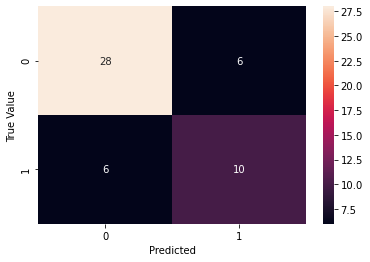

In [69]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Beige is equivalent to true positives (31 TP)
#Purple is equivalent to false negatives (14 FN)
#Bottom right Black is equivalent to true negatives (2 TN)
#Top right Black is equivalent to false positives (2 FP)

In [70]:
#Attributing a FactorValue..progression.value to y_test
y_testP = df_patient_info_test['FactorValue..progression.']
x_testP = RNA_test

In [71]:
model_rfcP.predict(x_testP)

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0])

In [72]:
#Implementing SVC
svcP = SVC(kernel='rbf')

In [73]:
svcP.fit(X_train_P, y_train_P)

SVC()

In [74]:
print('SVC Accuracy：\n',svcP.score(X_test_P, y_test_P))

SVC Accuracy：
 0.72


In [75]:
#Visualizing SVC true/false predictions 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_P,svcP.predict(X_test_P))
cm

array([[28,  6],
       [ 8,  8]])

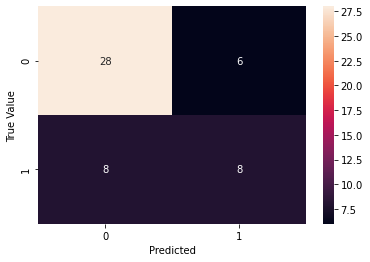

In [76]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Beige is equivalent to true positives (33 TP)
#Purple is equivalent to false negatives (15 FN)
#Bottom right Black is equivalent to true negatives (1 TN)
#Top right Black is equivalent to false positives (1 FP)


In [78]:
progression = svcP.predict(x_testP)
print(progression)

[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0]


In [79]:
progression = pd.DataFrame(progression)
progression.dropna().to_csv("progression.csv", index=False)

In [80]:
#Splitting the microarray data 
#microarray = df_prop_intensities.drop(columns=['GeneSymbols'])
#microarray.shape

In [81]:
#Removing odd number IDs
#microarray_test1 = microarray.iloc[0:44708,1::2]

#Transform RNASeq Data 
#microarray_test = microarray_test1.transpose()
#microarray_test.head()

In [82]:
#Removing even number IDs
#microarray_train1 = microarray.iloc[0:44708,::2]

#Transform RNASeq Data 
#microarray_train = microarray_train1.transpose()
#microarray_train.head()

In [83]:

#Attributing an integer value (FactorValue..iss.stage.) to y_train
y_train4 = df_patient_info_train['FactorValue..inss.stage.']


In [84]:
age = df_patient_info_train['FactorValue..age.at.diagnosis.'].astype(int)

In [85]:
#Splitting y_train, and RNA_train data and our test size is 20% of our sample
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    RNA_train, y_train4, test_size=0.2, random_state=0)

In [86]:
#Confidence Score
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(RNA_train, y_train4)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_param':model_selection.best_params_
    })

In [87]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_param'])
df_model_score

#S model showed to have the best score for FactorValue..inss.stage.

,model,best_score,best_param
0,DecisionTreeClassifier,0.470122,{'criterion': 'entropy'}
1,RandomForestClassifier,0.538204,{'n_estimators': 150}
2,KNeighborsClassifier,0.526122,{'n_neighbors': 15}
3,svc,0.558286,{'kernel': 'linear'}


In [88]:
#Validating RFC model 
model_rfc4 = RandomForestClassifier(n_estimators = 80)

In [89]:
model_rfc4.fit(X_train_4, y_train_4)

RandomForestClassifier(n_estimators=80)

In [90]:
model_rfc4.score(X_test_4, y_test_4)#######

0.46

In [91]:
model_rfc4.predict(X_test_4)

array(['1', '4', '4', '1', '4S', '1', '4', '4', '4', '4', '1', '4', '2',
       '4', '4', '4', '2', '1', '4', '2', '4', '4', '1', '1', '2', '4',
       '2', '1', '2', '4S', '4', '1', '4', '1', '4', '1', '1', '4', '1',
       '1', '4', '4', '1', '4', '2', '1', '4', '4', '4', '4'],
      dtype=object)

In [92]:
#Visualizing RFC true/false predictions 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_4,model_rfc4.predict(X_test_4))
cm

array([[ 5,  2,  0,  4,  0],
       [ 5,  2,  0,  2,  1],
       [ 5,  2,  0,  3,  0],
       [ 0,  1,  0, 15,  0],
       [ 1,  0,  0,  1,  1]])

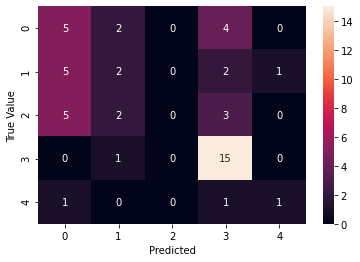

In [93]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Predictions
#0 (Stage 1) we have 7 true positives
#1 (th)

In [94]:
model_rfc4.fit(RNA_train, y_train4)

RandomForestClassifier(n_estimators=80)

In [95]:
inss_stage = model_rfc4.predict(RNA_test)
print(inss_stage)

['4' '4' '4' '4' '4' '2' '1' '2' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '2' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2'
 '4' '2' '1' '4' '4' '2' '4' '4' '4' '4' '4' '1' '2' '1' '1' '2' '1' '1'
 '1' '1' '2' '1' '1' '2' '4' '4' '1' '1' '2' '1' '1' '4' '4' '4' '1' '4'
 '1' '1' '2' '4S' '1' '2' '1' '1' '1' '2' '2' '4S' '4S' '2' '1' '4' '1'
 '1' '2' '2' '4' '4' '4' '4' '4' '4' '4' '1' '1' '4' '2' '1' '1' '1' '4'
 '4' '1' '1' '4' '2' '1' '1' '3' '1' '1' '4' '4' '4' '4' '1' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '1' '1' '4' '2' '4S' '4' '1'
 '4S' '4S' '4S' '1' '4S' '4' '1' '4' '1' '1' '4S' '4S' '4' '4' '4' '1' '4'
 '4' '1' '4' '4' '2' '4' '4' '4' '4' '1' '1' '1' '1' '1' '2' '4' '4' '1'
 '3' '4' '4' '1' '4' '1' '4S' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '1' '4' '4' '4' '4' '4' '4' '1' '4' '4' '4' '1' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '2' '4'
 '4' '4' '1' '4' '4S' '1' '4' '4' '1' '4' '4' '4

In [96]:
inss_stage = pd.DataFrame(inss_stage)
inss_stage.dropna().to_csv("inss_stage.csv", index=False)

In [113]:
#Implementing SVC
svc4 = SVC(kernel='linear')

In [114]:
svc4.fit(X_train_4, y_train_4)

SVC(kernel='linear')

In [115]:
print('SVC Accuracy：\n',svc4.score(X_test_4, y_test_4))

SVC Accuracy：
 0.44


In [116]:
#Visualizing SVC true/false predictions 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_4,svc4.predict(X_test_4))
cm

array([[ 4,  3,  1,  3,  0],
       [ 5,  2,  2,  0,  1],
       [ 5,  0,  1,  3,  1],
       [ 0,  1,  1, 13,  1],
       [ 1,  0,  0,  0,  2]])

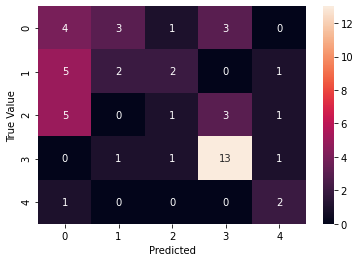

In [117]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Beige is equivalent to true positives (33 TP)
#Purple is equivalent to false negatives (15 FN)
#Bottom right Black is equivalent to true negatives (1 TN)
#Top right Black is equivalent to false positives (1 FP)


In [119]:
INSS_Stage = svc4.predict(RNA_test)
print(INSS_Stage)

['4' '4S' '4S' '4' '4' '2' '1' '1' '1' '1' '2' '1' '1' '1' '2' '1' '1' '1'
 '1' '1' '1' '1' '1' '2' '1' '1' '2' '1' '1' '2' '1' '2' '3' '1' '1' '1'
 '4S' '2' '1' '4' '4' '2' '4' '1' '2' '4' '4' '1' '2' '2' '2' '2' '1' '2'
 '1' '1' '2' '2' '1' '2' '4' '4S' '1' '3' '2' '1' '1' '4' '4' '4' '3' '4'
 '4S' '3' '2' '1' '1' '2' '1' '2' '4' '2' '4S' '4S' '4S' '2' '2' '4' '2'
 '3' '1' '2' '2' '4' '4' '4' '4' '4' '4' '1' '1' '4S' '4S' '1' '1' '2' '1'
 '1' '2' '1' '4' '1' '1' '3' '2' '4S' '3' '4' '4' '4S' '4' '1' '4' '4' '4'
 '3' '3' '4' '4' '3' '4' '3' '4' '4' '4' '4' '2' '1' '4S' '4S' '4S' '4S'
 '4S' '4S' '4' '4S' '1' '4S' '4S' '1' '2' '3' '1' '4S' '4S' '4S' '4S' '4S'
 '1' '4' '4' '1' '4' '4' '2' '4' '4' '4' '4' '1' '1' '1' '3' '1' '3' '4'
 '4S' '1' '4S' '4' '4' '4S' '1' '1' '4S' '4' '4' '4' '4' '1' '1' '4' '4'
 '4' '4' '4' '4' '4' '2' '4' '4' '2' '4' '4' '4' '1' '4' '4' '4' '1' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '3' '4' '4' '4'
 '4' '3' '4' '4' '2' '1' '2' '4S' '1' '4'

In [79]:
INSS_Stage = pd.DataFrame(INSS_Stage)
INSS_Stage.dropna().to_csv("INSS_S.csv", index=False)

In [97]:
#save module
#create a "save" folder in the working directory
import joblib
joblib.dump(model_rfc,'save/inss_stage.m')

NameError: name 'model_rfc' is not defined

In [ ]:
#restore
model_rfc2 = joblib.load('save/inss_stage.m')

In [ ]:
#use the module
z=model_rfc2.predict(RNA_test)

In [106]:
df_patient_info_test_predictions = pd.DataFrame(index=df_patient_info_test.index)

In [107]:
endpointD = 'FactorValue..death.from.disease.'

In [108]:
endpointH = 'FactorValue..high.risk.'

In [109]:
endpoint4 = 'FactorValue..inss.stage.'

In [110]:
endpointP = 'FactorValue..progression.'

In [121]:
# predict death for the test set patients
df_patient_info_test_predictions.loc[RNA_test.index,'{}prediction'.format(endpointD)]  = model_rfcD.predict(RNA_test)
#predict high risk
df_patient_info_test_predictions.loc[RNA_test.index,'{}prediction'.format(endpointH)]  = svc.predict(RNA_test)
#predict INSS stage
df_patient_info_test_predictions.loc[RNA_test.index,'{}prediction'.format(endpoint4)]  = svc4.predict(RNA_test)
#predict progression
df_patient_info_test_predictions.loc[RNA_test.index,'{}prediction'.format(endpointP)]  = model_rfcP.predict(RNA_test)


df_patient_info_test_predictions.head(10)


,FactorValue..death.from.disease.prediction,FactorValue..high.risk.prediction,FactorValue..inss.stage.prediction,FactorValue..progression.prediction
ID,,,,
NB002,0,1,4,1
NB004,0,1,4S,1
NB006,0,0,4S,0
NB008,0,1,4,1
NB010,1,1,4,1
NB012,0,0,2,0
NB014,0,0,1,0
NB016,0,0,1,0
NB018,0,0,1,0


In [123]:
def save_predictions(df_patient_info_test_predictions,group_number=6,data_origin='undefined',output_dir='predictions'):
    # check for correct group number
    if not (group_number > 0 and group_number<6):
        raise Exception('Wrong group number')
    # check for allowed data origin
    if data_origin not in ['mirocarray', 'rnaseq', 'other']:
        raise Exception("data_origin can only be one of 'mirocarray', 'rnaseq' or 'other'")

    # check if outout_dir exists - if not create - if permission do not allow that, this raises an error
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    outfile_name = 'msc_bio_m3_group_{}_data_{}.tsv'.format(str(group_number).zfill(2),data_origin)
    full_outfile_path = '{}{}{}'.format(output_dir,os.path.sep,outfile_name)
    dataframe.to_csv(full_outfile_path,sep='\t')
    return full_outfile_path